In [2]:
import pandas as pd
import numpy as np
import src_loader
from clustering import perform_silhouette_analysis
from clustering import kmeans_with_nPC
import torch
import matplotlib.pyplot as plt
from datasets import BinaryClassification

In [3]:
df = pd.read_csv('../embeddings/9000-reduced.csv')

In [4]:
df

0          1          2          3          4          5  \
0    -21.299667  32.261593 -28.177048 -37.249123  -3.704438  34.628754   
1    -56.283886 -30.074326 -81.759109  -4.052350 -35.481541  -4.374282   
2    -25.210741  -4.753843 -22.356796   3.772167 -16.971136  21.011721   
3    -48.829605 -34.789955 -51.407059   1.988263  -4.416625   6.967238   
4    -27.221268  12.396926 -41.847622 -23.581699  31.019787   2.528402   
...         ...        ...        ...        ...        ...        ...   
8995 -45.574051  12.174526 -49.758976  29.275686   9.637860  -1.570266   
8996 -36.471340 -32.875038 -25.684452  -2.433419 -12.288149  13.767881   
8997 -53.773594  -0.977353 -44.350838  14.202502  -0.609206  12.917790   
8998 -35.692646 -11.873449 -47.682163   9.995826  17.105328   5.973217   
8999 -56.693195   5.509793 -80.145958   1.581704  -0.993240  -4.074713   

              6          7          8          9  ...         59         60  \
0     39.220909 -40.031151   0.152630  20.802828  ...  30.300699 -20.861006   
1    -19.196861  11.326805  28.211580 -28.033295  ...  26.069040  14.635753   
2      1.438313  -6.899968  -6.110332  29.094576  ...  51.794037  -8.272974   
3     -8.308749  -2.129224 -11.202515  -4.481016  ...  48.363720   5.243617   
4     12.696031 -12.635411  -5.128788 -22.591463  ...  10.650691 -18.727831   
...         ...        ...        ...        ...  ...        ...        ...   
8995  -6.343040   8.482224  -0.049370   2.870044  ...  43.469231 -20.681265   
8996 -13.277642 -22.504740  18.141476  -7.504139  ...  52.064232   9.095403   
8997  -8.810918 -16.884108  29.495491 -26.967489  ...  58.386406  14.934637   
8998 -10.071754  27.786879 -36.971260  18.893015  ...  31.760752 -20.481298   
8999  -7.225515  13.461308  11.098278   4.771927  ...  34.928314   2.269998   

             61         62         63   l1   l2   l3   l4   l5  
0      8.802766  25.084208   7.601823  1.0  0.0  0.0  0.0  1.0  
1     44.026131 -22.139753  -8.531412  1.0  0.0  0.0  0.0  0.0  
2     33.698402  -0.468185  55.317795  1.0  0.0  0.0  0.0  0.0  
3     52.831150 -15.408292  33.230385  1.0  0.0  0.0  0.0  0.0  
4     20.307632  -4.757751  -3.738983  1.0  0.0  0.0  0.0  0.0  
...         ...        ...        ...  ...  ...  ...  ...  ...  
8995  55.980392  16.347504  42.774601  0.0  1.0  0.0  0.0  1.0  
8996  22.005985 -20.151617  12.378517  0.0  0.0  1.0  0.0  1.0  
8997  29.060814  -5.724248   3.253018  0.0  1.0  0.0  1.0  1.0  
8998  51.092819  -8.962857  44.711353  0.0  0.0  1.0  0.0  1.0  
8999  55.997925   4.551834  14.560035  0.0  0.0  0.0  1.0  1.0  

[9000 rows x 69 columns]

In [5]:
pixels = df.drop(['l1', 'l2', 'l3', 'l4', 'l5'], axis = 1)
pix_arr = np.array(pixels)

For n_clusters = 2 The average silhouette_score is : 0.16666639700321226
For n_clusters = 3 The average silhouette_score is : 0.16513880705250378
For n_clusters = 4 The average silhouette_score is : 0.15724737453466645
For n_clusters = 5 The average silhouette_score is : 0.14768115240515056
For n_clusters = 6 The average silhouette_score is : 0.1338297175364476
For n_clusters = 7 The average silhouette_score is : 0.13296455606308866
For n_clusters = 8 The average silhouette_score is : 0.11475479402523181
For n_clusters = 9 The average silhouette_score is : 0.11347825734489445
For n_clusters = 10 The average silhouette_score is : 0.1071028259843146
For n_clusters = 11 The average silhouette_score is : 0.10824076499819978
For n_clusters = 12 The average silhouette_score is : 0.11201623354008328
For n_clusters = 13 The average silhouette_score is : 0.10953629468563301
For n_clusters = 14 The average silhouette_score is : 0.10910327226751072
For n_clusters = 15 The average silhouette_score

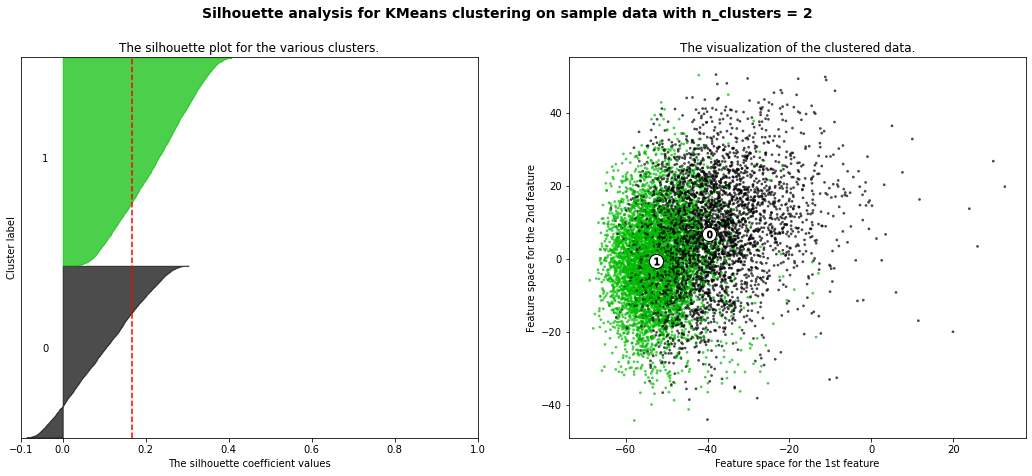

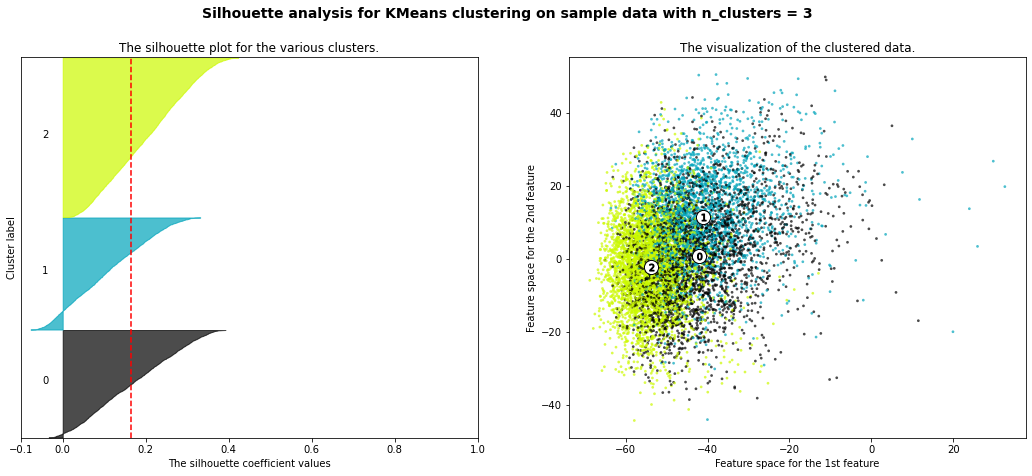

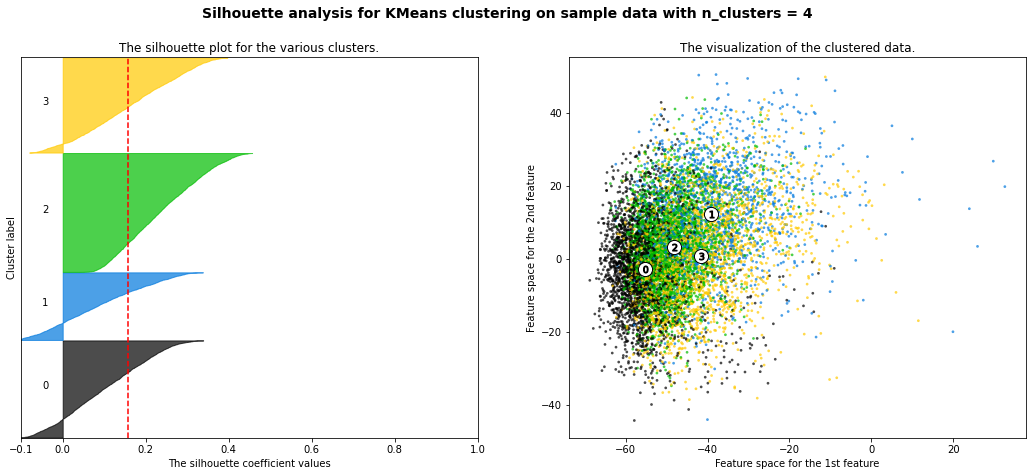

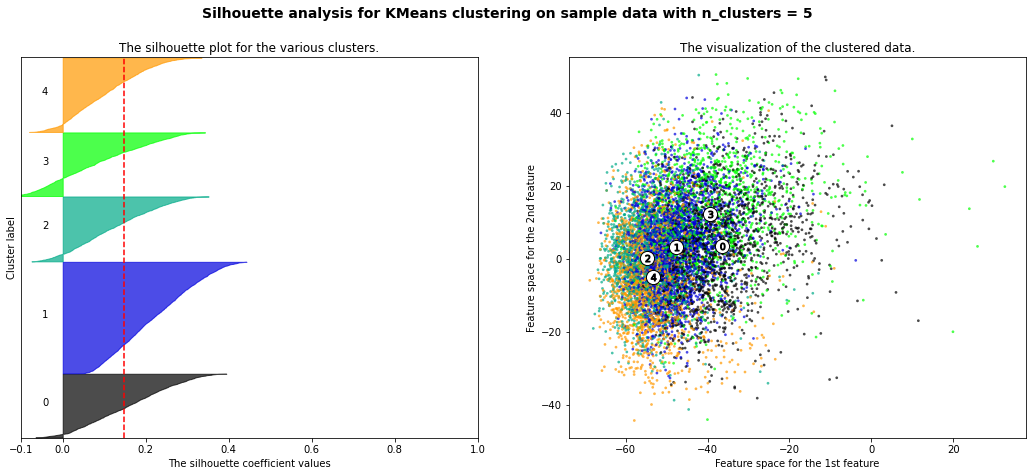

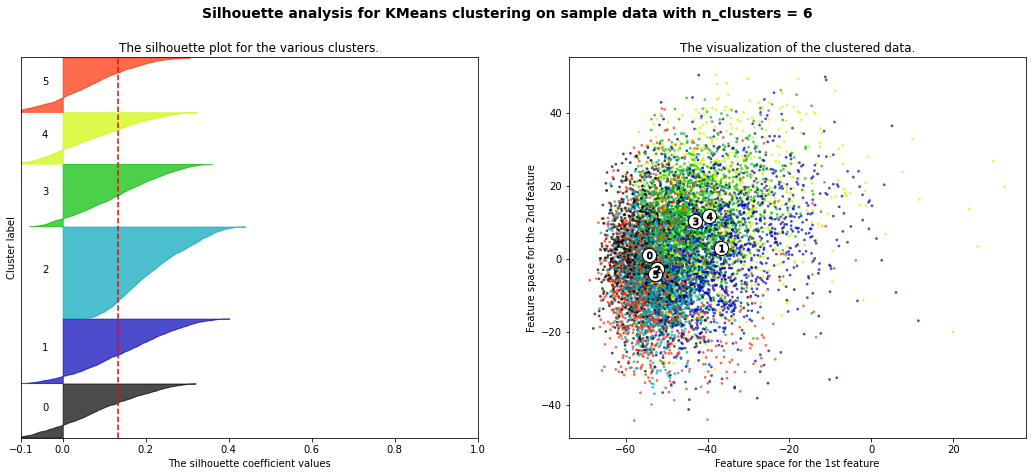

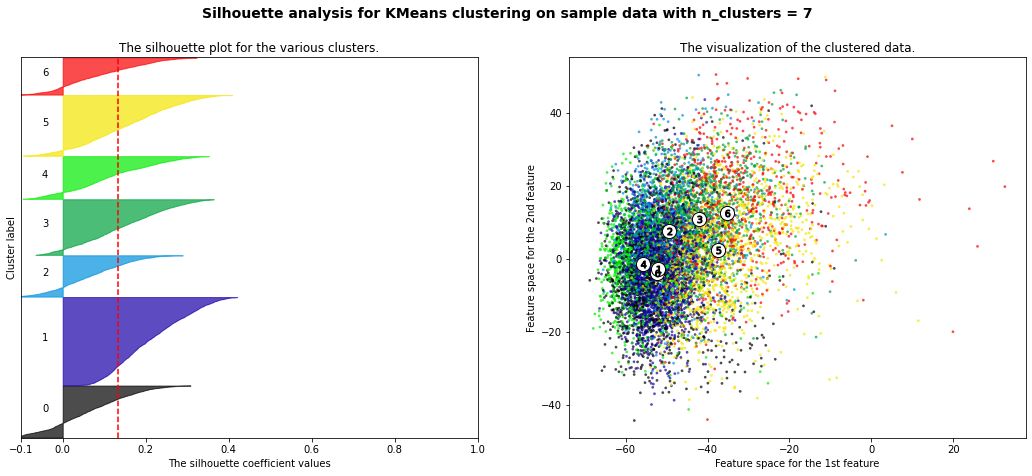

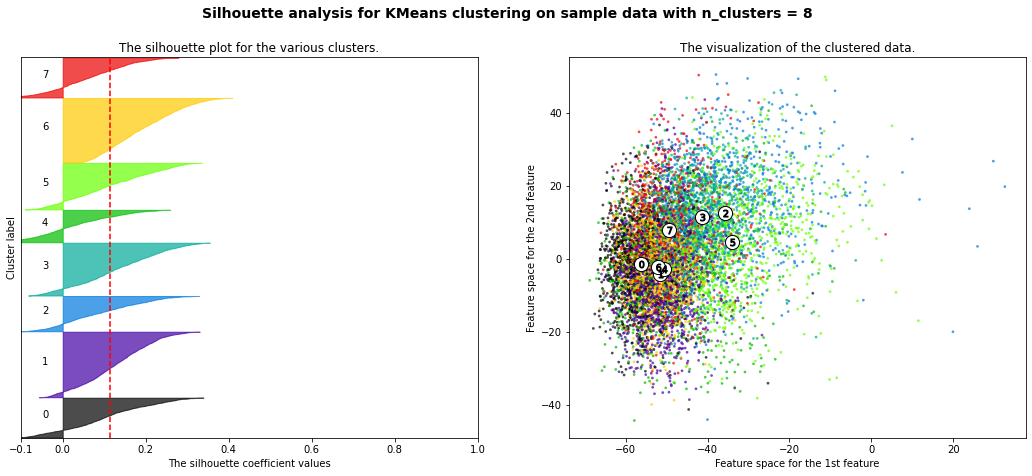

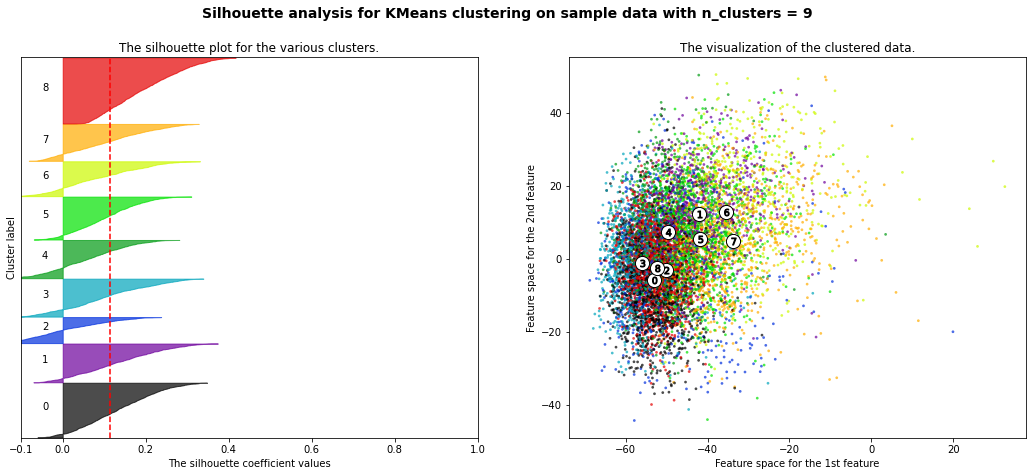

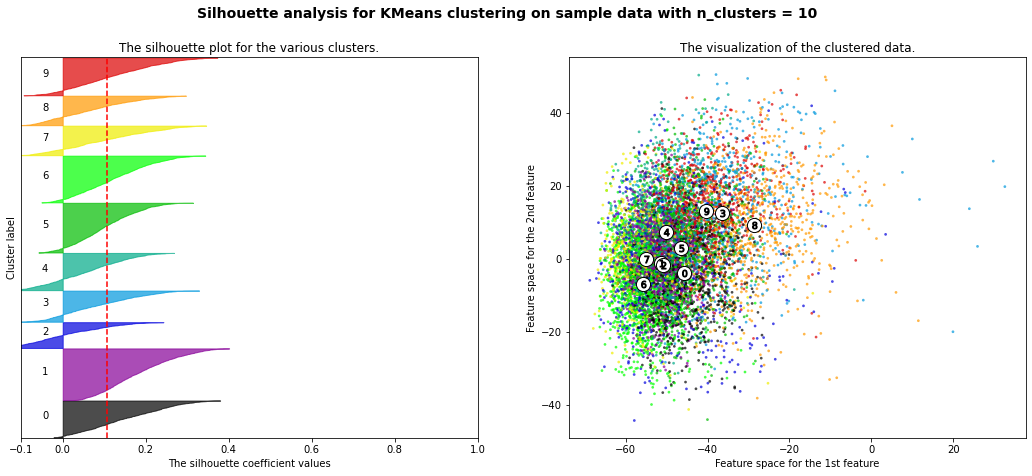

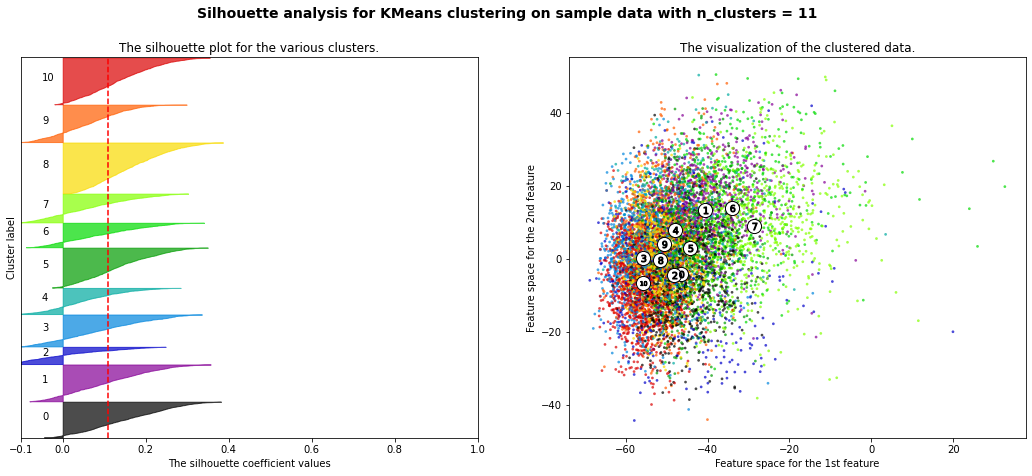

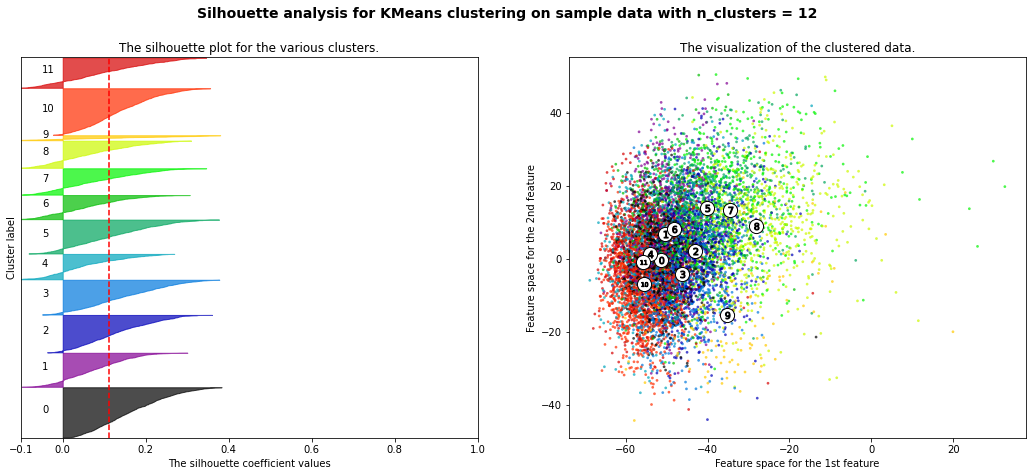

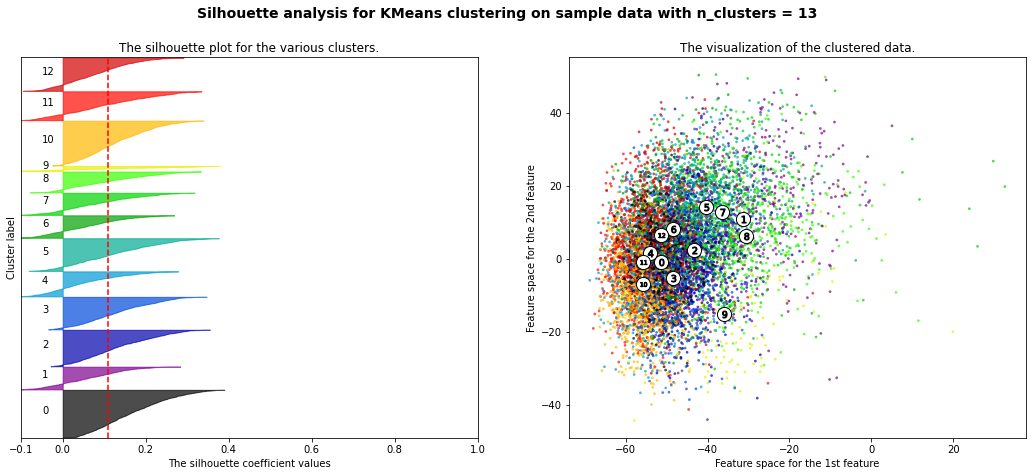

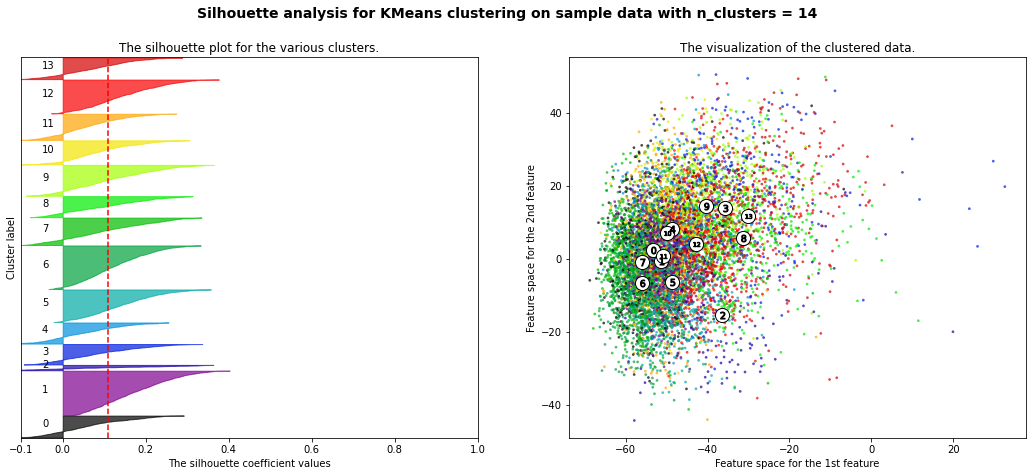

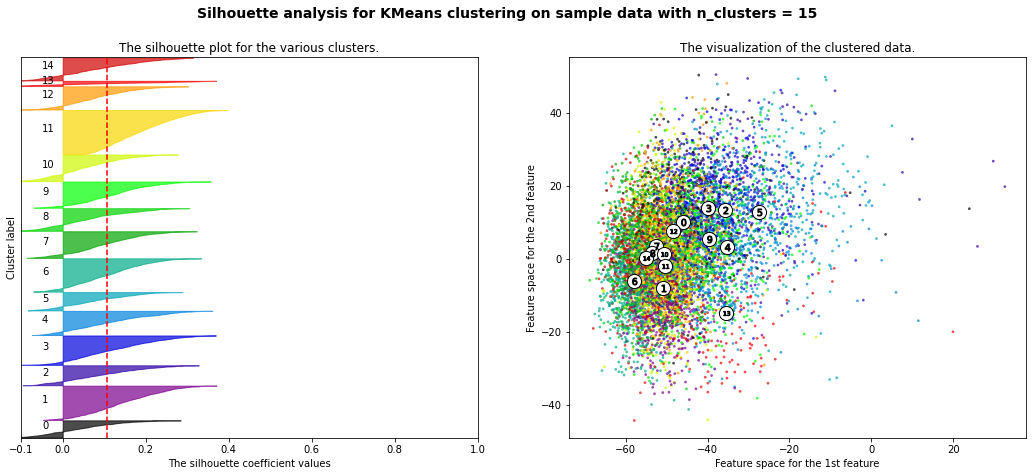

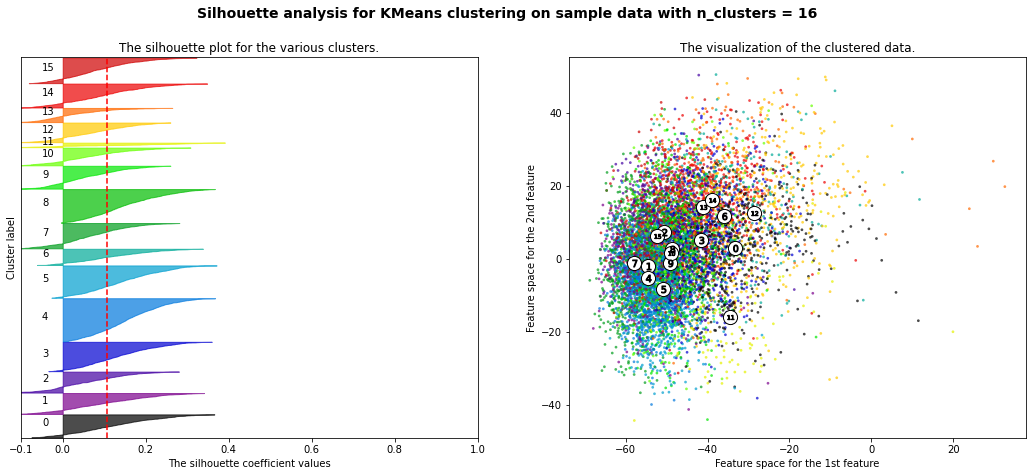

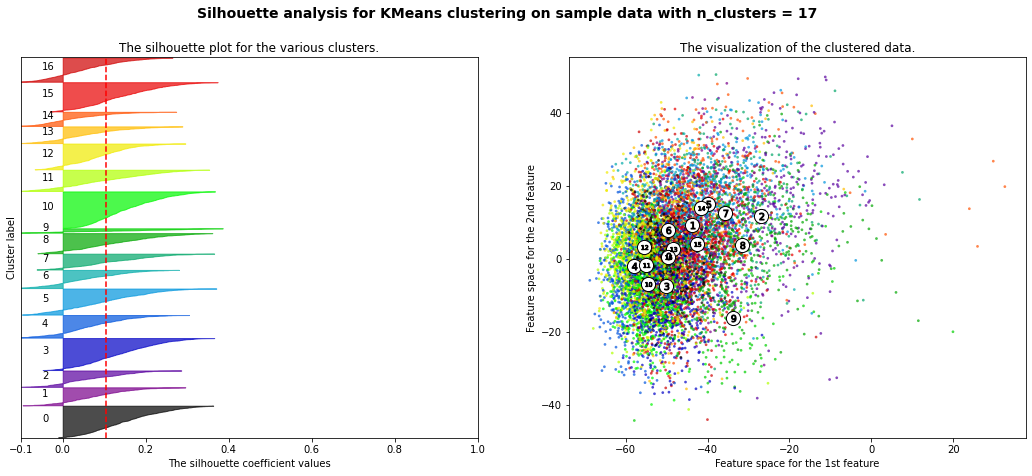

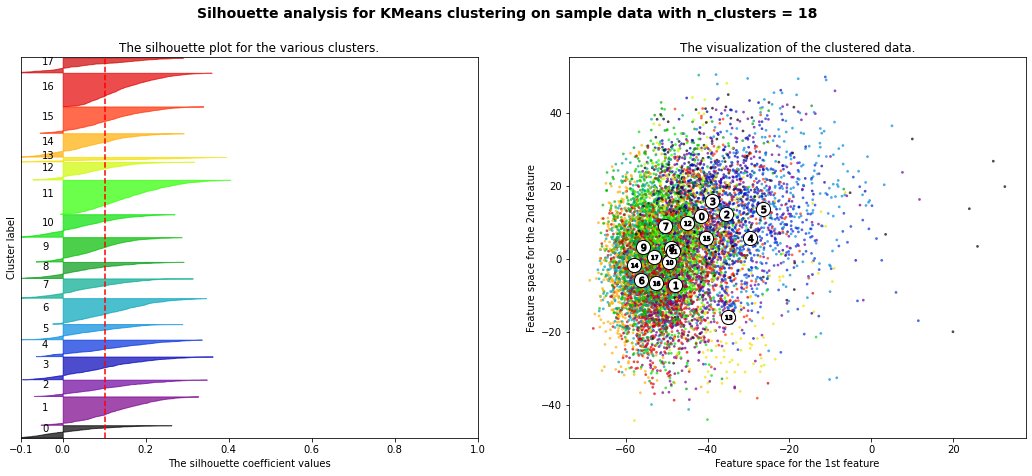

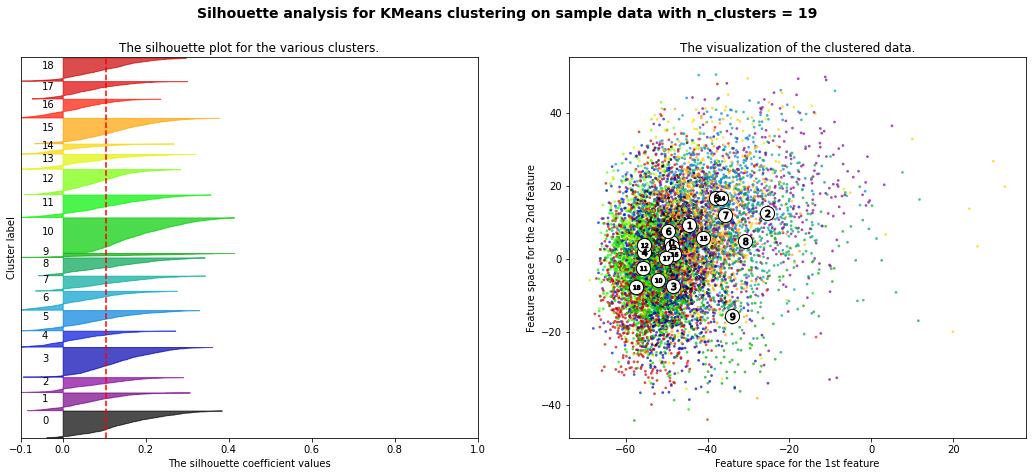

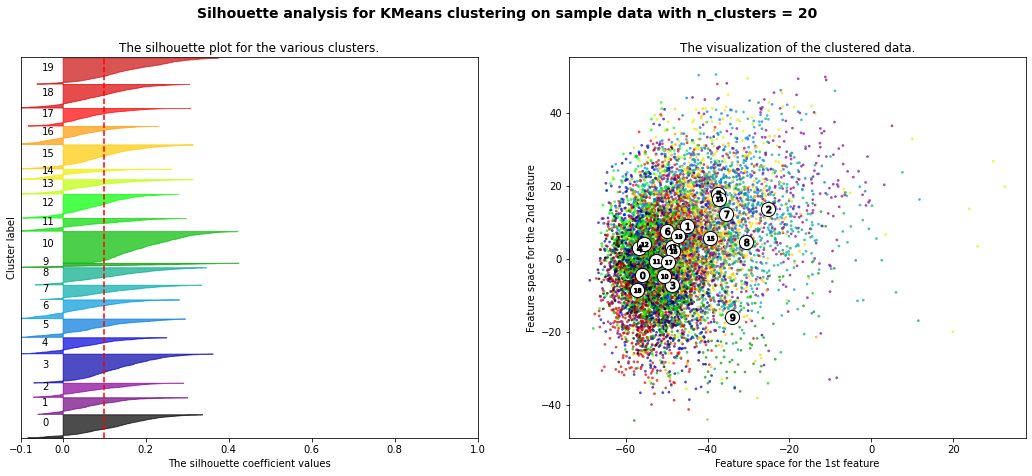

In [6]:
perform_silhouette_analysis(pix_arr, 2, 20)

In [7]:
kmeans, kmeans_l = kmeans_with_nPC(pix_arr, 12)

In [8]:
df['cluster'] = kmeans_l

In [9]:
training_set = BinaryClassification('../Data/reduced/CheXpert-v1.0/train-9000-reduced.csv')
data = training_set
data_loader = torch.utils.data.DataLoader(data, batch_size=1, shuffle=False)

In [10]:
def represent_n_cluster(cluster_number):
    count = 0
    f, axs = plt.subplots(2,10, figsize=(30,6))
    for idx, batch in enumerate(data_loader):
        img = batch[0][0][0]
        cl = df.iloc[idx]["cluster"]
        if (cl == cluster_number):
            ir = 0 if count < 10 else 1
            ic = count if count < 10 else count-10
            axs[ir][ic].imshow(img, cmap="gray")
            axs[ir][ic].axis('off')
            count+=1
        if (count == 20):
            break

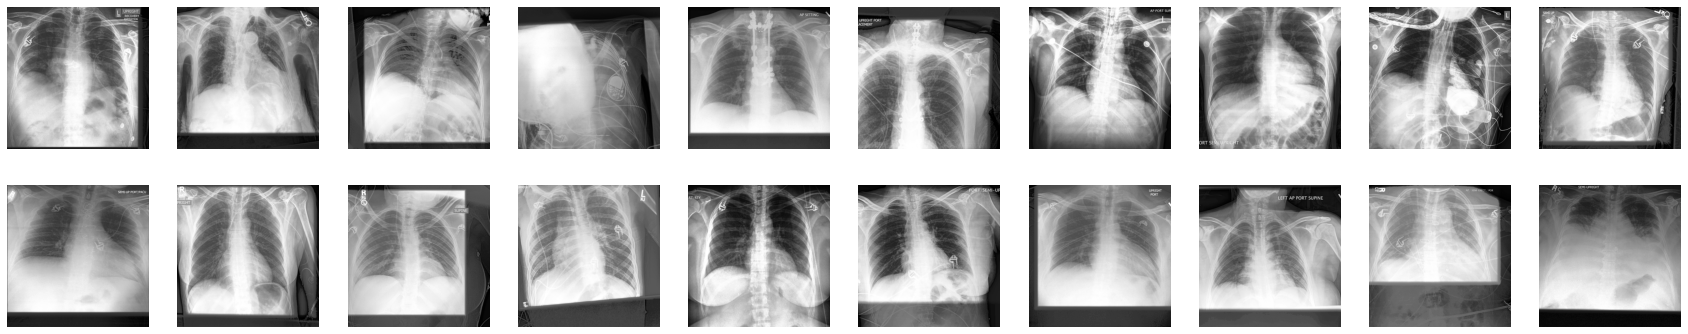

In [11]:
represent_n_cluster(0)